In [1]:
'''
                Python 3.6.13
    *** MUST USE THE FOLLOWING PACKAGE VERSIONS ***
                numpy==1.16.3
                pandas=0.24.2
                opencv-python==4.1.0.25
                scipy==1.2.1
                scikit-learn==0.21.1
                tensorflow==1.13.1
                keras==2.2.4
                h5py==2.9.0
                matplotlib==3.0.3
                
    *** AFTER INSTALLING ALL THESE PACKAGES, INSTALL THE SETUP FILE ***
                python setup.py install
'''
!python --version

Python 3.6.13 :: Anaconda, Inc.


# Single-image food volume estimation
Using a  monocular depth estimation network and a segmentation network, we will estimate the volume of the food displayed in the input image.

In [2]:
import sys
import json
from keras.models import Model, model_from_json
from food_volume_estimation.volume_estimator import VolumeEstimator
from food_volume_estimation.depth_estimation.custom_modules import *
from food_volume_estimation.food_segmentation.food_segmentator import FoodSegmentator
import matplotlib.pyplot as plt
from pyntcloud import PyntCloud

# Paths to model archiecture/weights
depth_model_architecture = 'D:/Google Drive/Software Engineering/לימודים/1הסמסטר/פרויקט מסכם שלב ב/Code/food_volume_estimation/food_volume_estimation-master/models/fine_tune_food_videos/monovideo_fine_tune_food_videos.json'
depth_model_weights = 'D:/Google Drive/Software Engineering/לימודים/1הסמסטר/פרויקט מסכם שלב ב/Code/food_volume_estimation/food_volume_estimation-master/models/fine_tune_food_videos/monovideo_fine_tune_food_videos.h5'
segmentation_model_weights = 'D:/Google Drive/Software Engineering/לימודים/1הסמסטר/פרויקט מסכם שלב ב/Code/food_volume_estimation/food_volume_estimation-master/models/segmentation/mask_rcnn_food_segmentation.h5'

Using TensorFlow backend.
C:\Users\samra\anaconda3\envs\final_proj_py36\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Create estimator object and intialize
estimator = VolumeEstimator(arg_init=False)
with open(depth_model_architecture, 'r') as read_file:
    custom_losses = Losses()
    objs = {'ProjectionLayer': ProjectionLayer,
            'ReflectionPadding2D': ReflectionPadding2D,
            'InverseDepthNormalization': InverseDepthNormalization,
            'AugmentationLayer': AugmentationLayer,
            'compute_source_loss': custom_losses.compute_source_loss}
    model_architecture_json = json.load(read_file)
    estimator.monovideo = model_from_json(model_architecture_json, custom_objects=objs)
estimator._VolumeEstimator__set_weights_trainable(estimator.monovideo, False)
estimator.monovideo.load_weights(depth_model_weights)
estimator.model_input_shape = estimator.monovideo.inputs[0].shape.as_list()[1:]
depth_net = estimator.monovideo.get_layer('depth_net')
estimator.depth_model = Model(inputs=depth_net.inputs, outputs=depth_net.outputs, name='depth_model')
print('[*] Loaded depth estimation model.')

# Depth model configuration
MIN_DEPTH = 0.01
MAX_DEPTH = 10
estimator.min_disp = 1 / MAX_DEPTH
estimator.max_disp = 1 / MIN_DEPTH
estimator.gt_depth_scale = 0.35 # Ground truth expected median depth

# Create segmentator object
estimator.segmentator = FoodSegmentator(segmentation_model_weights)

# Set plate adjustment relaxation parameter
estimator.relax_param = 0.01

[*] VolumeEstimator not initialized.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Use tf.cast instead.
[*] Loaded depth estimation model.
[*] Loading segmentation model weights D:/Google Drive/Software Engineering/לימודים/1הסמסטר/פרויקט מסכם שלב ב/Code/food_volume_estimation/food_volume_estimation-master/models/segmentation/mask_rcnn_food_segmentation.h5


[*] Creating intrinsics matrix from given FOV: 70


C:\Users\samra\anaconda3\envs\final_proj_py36\lib\site-packages\food_volume_estimation-0.3-py3.6.egg\food_volume_estimation\ellipse_detection\ellipse_center_estimator.py:84: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\samra\anaconda3\envs\final_proj_py36\lib\site-packages\food_volume_estimation-0.3-py3.6.egg\food_volume_estimation\ellipse_detection\ellipse_center_estimator.py:85: RuntimeWarning: divide by zero encountered in double_scalars


[*] No ellipse found. Scaling with expected median depth.
[*] Found 3 food object(s) in image.
[*] Estimated plane parameters (w0,w1,w2,w3): [0.3328966329926067, -0.03408435606789292, -0.27747424500932444, -0.960128272694822]
[*] Estimated volume: 4.52480324414234 L


<IPython.core.display.Javascript object>


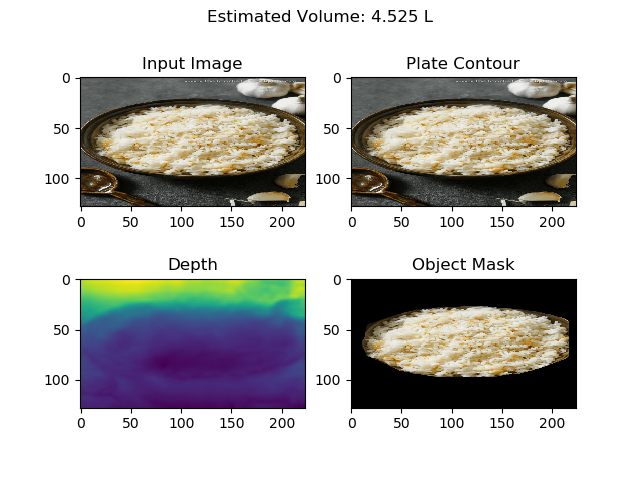

[*] Estimated plane parameters (w0,w1,w2,w3): [0.4320084457121049, -0.16573410638589378, -0.3896061791436618, -0.905946593985289]
[*] Estimated volume: 0.010817052983647588 L


<IPython.core.display.Javascript object>


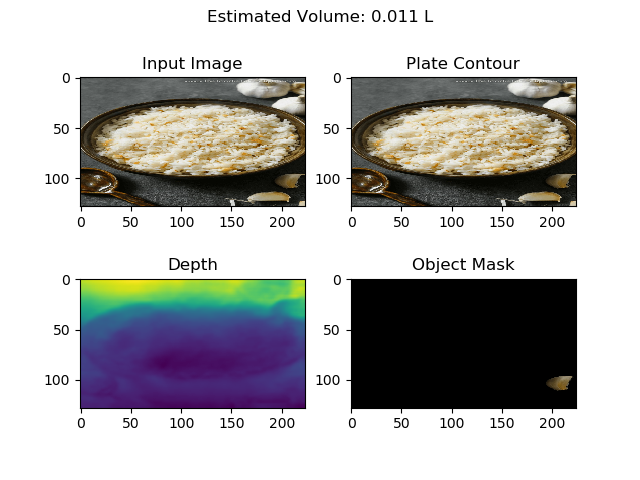

[*] Estimated plane parameters (w0,w1,w2,w3): [0.49191180757953823, 0.09358898442123134, -0.08788732869623309, -0.9917242154196109]
[*] Estimated volume: 0.7349020540324842 L


<IPython.core.display.Javascript object>


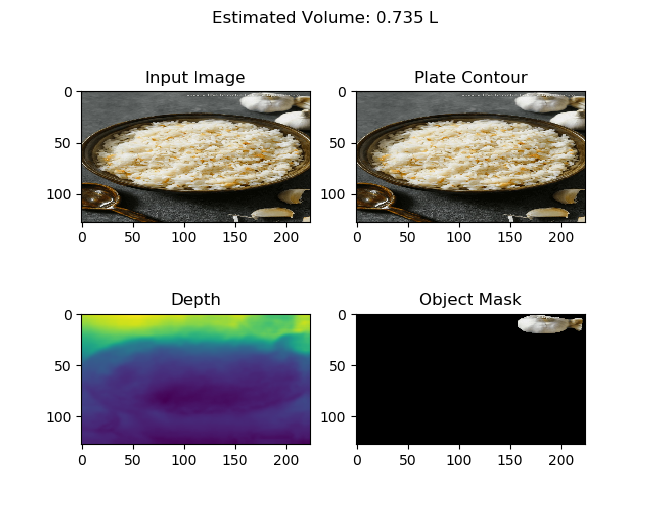

C:\Users\samra\anaconda3\envs\final_proj_py36\lib\site-packages\pythreejs\traits.py:191: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.00730975061299603, 0.14776897619578772, 0…

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(0.009461456985774934, 0.3044538765985858, 0.…

<IPython.core.display.Javascript object>


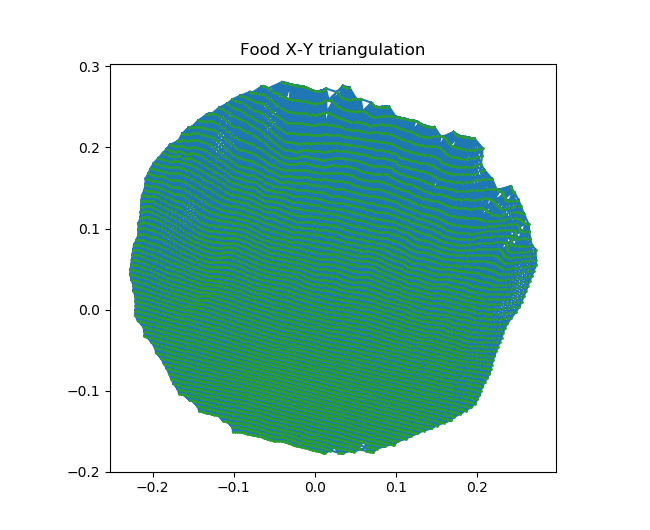

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.20328138111416338, 0.4692561878800794, 0.…

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.02909702694420968, -0.026105453356281505,…

<IPython.core.display.Javascript object>


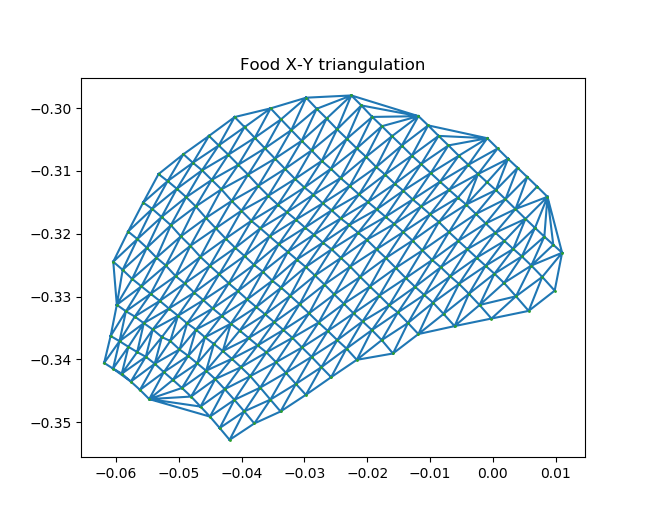

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.26865615671997406, -0.08998984415758848, …

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.5094944114052322, 0.6031393553509407, 0.1…

<IPython.core.display.Javascript object>


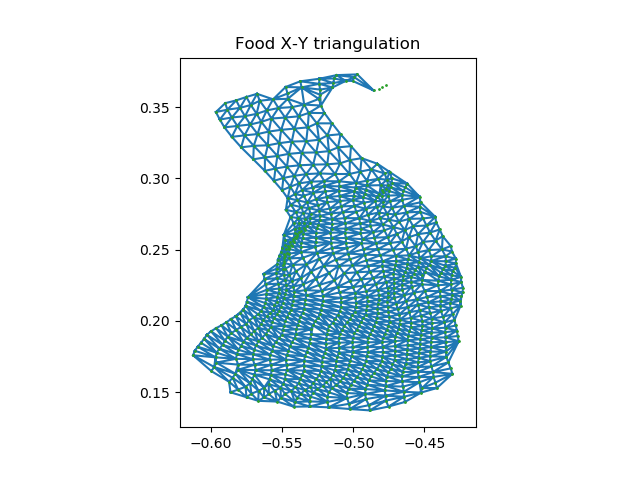

In [4]:
%matplotlib notebook

# Estimate volumes in input image
input_image = 'C:/Users/samra/Final_Proj_NoteBook/Volume_Estimation/test_images/rice.jpg'
plate_diameter = 0.35 # Set as 0 to ignore plate detection and scaling
outputs_list = estimator.estimate_volume(input_image, fov=70, plate_diameter_prior=plate_diameter, 
                                         plot_results=True)

# Plot results for all detected food objects
for outputs in outputs_list:
    (estimated_volume, object_points_df, non_object_points_df, plane_points_df, object_points_transformed_df, 
        plane_points_transformed_df, simplices) = outputs
    fig = plt.gcf()
    fig.set_size_inches(6.5, 5.3)
    
    # Flip x and z coordinates to match point cloud with plotting axes
    object_points_df.values[:,0] *= -1
    object_points_df.values[:,2] *= -1
    non_object_points_df.values[:,0] *= -1
    non_object_points_df.values[:,2] *= -1
    plane_points_df.values[:,0] *= -1
    plane_points_df.values[:,2] *= -1
    
    # Create point cloud objects and plot
    object_pc = PyntCloud(object_points_df)
    non_object_pc = PyntCloud(non_object_points_df)
    plane_pc = PyntCloud(plane_points_df)
    scene = object_pc.plot(initial_point_size=0.005, return_scene=True)
    non_object_pc.plot(initial_point_size=0.005, scene=scene)
    plane_pc.plot(initial_point_size=0.001, use_as_color='z', cmap='cool', scene=scene)
    
    # Create transformed point clouds and plot
    plane_transformed_pc = PyntCloud(plane_points_transformed_df)
    object_transformed_pc = PyntCloud(object_points_transformed_df)
    scene = object_transformed_pc.plot(initial_point_size=0.005, return_scene=True)
    plane_transformed_pc.plot(initial_point_size=0.005, use_as_color='x', cmap='cool', scene=scene)

    # Plot x-y plane triangulation of food object
    volume_points = object_points_transformed_df.values[object_points_transformed_df.values[:,2] > 0]
    plt.figure()
    plt.triplot(volume_points[:,0], volume_points[:,1], simplices)
    plt.plot(volume_points[:,0], volume_points[:,1], 'o', markersize=1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Food X-Y triangulation')

    plt.show()